Step 1: Load Data


In [0]:
import pandas as pd

In [0]:
# Loading Amazon Reviews Data
from datasets import load_dataset

# Load user reviews data
reviews_data = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
print(reviews_data["full"][0])  # Printing the first review

# Load product metadata
metadata = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
print(metadata[0])  # Printing the first metadata entry


/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:45: UserWarning: The cache_dir for this dataset is /root/.cache, which is not a persistent path.Therefore, if/when the cluster restarts, the downloaded dataset will be lost.The persistent storage options for this workspace/cluster config are: [DBFS, UC Volumes].Please update either `cache_dir` or the environment variable `HF_DATASETS_CACHE`to be under one of the following root directories: ['/dbfs/', '/Volumes/']
  warnings.warn(warning_message)


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:14: UserWarning: During large dataset downloads, there could be multiple progress bar widgets that can cause performance issues for your notebook or browser. To avoid these issues, use `datasets.utils.logging.disable_progress_bar()` to turn off the progress bars.
  warnings.warn(


All_Beauty.jsonl:   0%|          | 0.00/327M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

{'rating': 5.0, 'title': 'Such a lovely scent but not overpowering.', 'text': "This spray is really nice. It smells really good, goes on really fine, and does the trick. I will say it feels like you need a lot of it though to get the texture I want. I have a lot of hair, medium thickness. I am comparing to other brands with yucky chemicals so I'm gonna stick with this. Try it!", 'images': [], 'asin': 'B00YQ6X8EO', 'parent_asin': 'B00YQ6X8EO', 'user_id': 'AGKHLEW2SOWHNMFQIJGBECAF7INQ', 'timestamp': 1588687728923, 'helpful_vote': 0, 'verified_purchase': True}


/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:45: UserWarning: The cache_dir for this dataset is /root/.cache, which is not a persistent path.Therefore, if/when the cluster restarts, the downloaded dataset will be lost.The persistent storage options for this workspace/cluster config are: [DBFS, UC Volumes].Please update either `cache_dir` or the environment variable `HF_DATASETS_CACHE`to be under one of the following root directories: ['/dbfs/', '/Volumes/']
  warnings.warn(warning_message)
/databricks/python_shell/dbruntime/huggingface_patches/datasets.py:14: UserWarning: During large dataset downloads, there could be multiple progress bar widgets that can cause performance issues for your notebook or browser. To avoid these issues, use `datasets.utils.logging.disable_progress_bar()` to turn off the progress bars.
  warnings.warn(


meta_All_Beauty.jsonl:   0%|          | 0.00/213M [00:00<?, ?B/s]

Generating full split: 0 examples [00:00, ? examples/s]

{'main_category': 'All Beauty', 'title': 'Howard LC0008 Leather Conditioner, 8-Ounce (4-Pack)', 'average_rating': 4.8, 'rating_number': 10, 'features': [], 'description': [], 'price': 'None', 'images': {'hi_res': [None, 'https://m.media-amazon.com/images/I/71i77AuI9xL._SL1500_.jpg'], 'large': ['https://m.media-amazon.com/images/I/41qfjSfqNyL.jpg', 'https://m.media-amazon.com/images/I/41w2yznfuZL.jpg'], 'thumb': ['https://m.media-amazon.com/images/I/41qfjSfqNyL._SS40_.jpg', 'https://m.media-amazon.com/images/I/41w2yznfuZL._SS40_.jpg'], 'variant': ['MAIN', 'PT01']}, 'videos': {'title': [], 'url': [], 'user_id': []}, 'store': 'Howard Products', 'categories': [], 'details': '{"Package Dimensions": "7.1 x 5.5 x 3 inches; 2.38 Pounds", "UPC": "617390882781"}', 'parent_asin': 'B01CUPMQZE', 'bought_together': None, 'subtitle': None, 'author': None}


In [0]:
# Convert reviews and metadata to Spark DataFrames
reviews_df = pd.DataFrame(reviews_data["full"])
metadata_df = pd.DataFrame(metadata)

reviews_spark_df = spark.createDataFrame(reviews_df)
metadata_spark_df = spark.createDataFrame(metadata_df)

# Analyze reviews data
print("Reviews Dataset Analysis:")
print(f"Total Rows in Reviews: {reviews_spark_df.count()}")
print("Data Types for Reviews:")
reviews_spark_df.printSchema()
print(f"Sample Rows from Reviews:")
reviews_spark_df.show(5)

# Analyze metadata
print("\nMetadata Dataset Analysis:")
print(f"Total Rows in Metadata: {metadata_spark_df.count()}")
print("Data Types for Metadata:")
metadata_spark_df.printSchema()
print(f"Sample Rows from Metadata:")
metadata_spark_df.show(5)

# Check approximate size in memory
reviews_df_size = reviews_df.memory_usage(deep=True).sum() / 1e6  # Convert bytes to MB
metadata_df_size = metadata_df.memory_usage(deep=True).sum() / 1e6  # Convert bytes to MB




Reviews Dataset Analysis:
Total Rows in Reviews: 701528
Data Types for Reviews:
root
 |-- rating: double (nullable = true)
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- verified_purchase: boolean (nullable = true)

Sample Rows from Reviews:
+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+
|rating|               title|                text|images|      asin

Step 2: Cleaning Data

In [0]:
# Converting Data to Spark Dataframes
import pandas as pd

# Converting to Pandas DataFrame
reviews_df = pd.DataFrame(reviews_data["full"])
metadata_df = pd.DataFrame(metadata)

# Converting Pandas DataFrame to Spark DataFrame
reviews_spark_df = spark.createDataFrame(reviews_df)
metadata_spark_df = spark.createDataFrame(metadata_df)

# Displays schemas
reviews_spark_df.printSchema()
metadata_spark_df.printSchema()


root
 |-- rating: double (nullable = true)
 |-- title: string (nullable = true)
 |-- text: string (nullable = true)
 |-- images: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- attachment_type: string (nullable = true)
 |    |    |-- large_image_url: string (nullable = true)
 |    |    |-- medium_image_url: string (nullable = true)
 |    |    |-- small_image_url: string (nullable = true)
 |-- asin: string (nullable = true)
 |-- parent_asin: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- timestamp: long (nullable = true)
 |-- helpful_vote: long (nullable = true)
 |-- verified_purchase: boolean (nullable = true)

root
 |-- main_category: string (nullable = true)
 |-- title: string (nullable = true)
 |-- average_rating: double (nullable = true)
 |-- rating_number: long (nullable = true)
 |-- features: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- description: array (nullable = true)
 |    |-- eleme

Step 3: Data Exploration

In [0]:
# Data Exploration
# Shows data sample
reviews_spark_df.show(5)

# Checks for missing values
from pyspark.sql.functions import col, when, count

reviews_spark_df.select([count(when(col(c).isNull(), c)).alias(c) for c in reviews_spark_df.columns]).show()


+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+
|rating|               title|                text|images|      asin|parent_asin|             user_id|    timestamp|helpful_vote|verified_purchase|
+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+
|   5.0|Such a lovely sce...|This spray is rea...|    []|B00YQ6X8EO| B00YQ6X8EO|AGKHLEW2SOWHNMFQI...|1588687728923|           0|             true|
|   4.0|Works great but s...|This product does...|    []|B081TJ8YS3| B081TJ8YS3|AGKHLEW2SOWHNMFQI...|1588615855070|           1|             true|
|   5.0|                Yes!|Smells good, feel...|    []|B07PNNCSP9| B097R46CSY|AE74DYR3QUGVPZJ3P...|1589665266052|           2|             true|
|   1.0|   Synthetic feeling|      Felt synthetic|    []|B09JS339BZ| B09JS339BZ|AFQLNQNQYFWQZPJQZ...|1643393630220|   

In [0]:
# Data Cleaning
from pyspark.sql.functions import lower, regexp_replace, col

# Clean review text
reviews_cleaned = reviews_spark_df.withColumn(
    "cleaned_text",
    lower(regexp_replace(col("text"), "[^a-zA-Z0-9\s]", ""))  # Replace "reviewText" with "text"
)
reviews_cleaned.show(5)



+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+--------------------+
|rating|               title|                text|images|      asin|parent_asin|             user_id|    timestamp|helpful_vote|verified_purchase|        cleaned_text|
+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+--------------------+
|   5.0|Such a lovely sce...|This spray is rea...|    []|B00YQ6X8EO| B00YQ6X8EO|AGKHLEW2SOWHNMFQI...|1588687728923|           0|             true|this spray is rea...|
|   4.0|Works great but s...|This product does...|    []|B081TJ8YS3| B081TJ8YS3|AGKHLEW2SOWHNMFQI...|1588615855070|           1|             true|this product does...|
|   5.0|                Yes!|Smells good, feel...|    []|B07PNNCSP9| B097R46CSY|AE74DYR3QUGVPZJ3P...|1589665266052|           2|             true|smells good fe

In [0]:
# Alligning Reviews with Metadata
# Merge the reviews and metadata datasets using the ASIN (product ID) column to link reviews to product information
aligned_data = reviews_cleaned.join(metadata_spark_df, reviews_cleaned["asin"] == metadata_spark_df["parent_asin"], "inner")
aligned_data.show(5)


+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+--------------------+-------------+--------------------+--------------+-------------+--------+-----------+-----+--------------------+------------+--------------------+----------+--------------------+-----------+---------------+--------+------+
|rating|               title|                text|images|      asin|parent_asin|             user_id|    timestamp|helpful_vote|verified_purchase|        cleaned_text|main_category|               title|average_rating|rating_number|features|description|price|              images|      videos|               store|categories|             details|parent_asin|bought_together|subtitle|author|
+------+--------------------+--------------------+------+----------+-----------+--------------------+-------------+------------+-----------------+--------------------+-------------+--------------------+--------------+---

Step 4: Tokenization and Stop-Word Removal

In [0]:
# Tokenization and Stop Word Removal
# Using Spark MLlib to tokenize the text and remove common stop words

from pyspark.ml.feature import Tokenizer, StopWordsRemover

# Tokenize the cleaned text
tokenizer = Tokenizer(inputCol="cleaned_text", outputCol="tokens")
tokenized_data = tokenizer.transform(aligned_data)

# Remove stop words
remover = StopWordsRemover(inputCol="tokens", outputCol="filtered_tokens")
final_data = remover.transform(tokenized_data)
final_data.select("filtered_tokens").show(5)


+--------------------+
|     filtered_tokens|
+--------------------+
|[spray, really, n...|
|[product, need, w...|
|   [felt, synthetic]|
|              [love]|
|[polish, quiet, t...|
+--------------------+
only showing top 5 rows



Step 5: TF-IDF for Feature Engineering

In [0]:
from pyspark.ml.feature import HashingTF, IDF

hashingTF = HashingTF(inputCol="filtered_tokens", outputCol="raw_features", numFeatures=10000)
tf_data = hashingTF.transform(final_data)

idf = IDF(inputCol="raw_features", outputCol="tfidf_features")
idf_model = idf.fit(tf_data)
tfidf_data = idf_model.transform(tf_data)


In [0]:
from pyspark.sql.functions import when, col

# Map ratings to binary sentiment (polarity)
tfidf_data = tfidf_data.withColumn(
    "polarity",
    when(col("rating") >= 4, 1).when(col("rating") <= 2, 0).otherwise(None)  # 1 for positive, 0 for negative
)

# Drop rows with neutral ratings (if desired)
tfidf_data = tfidf_data.filter(col("polarity").isNotNull())

# Verify the polarity column
tfidf_data.select("rating", "polarity").show(10)


+------+--------+
|rating|polarity|
+------+--------+
|   5.0|       1|
|   4.0|       1|
|   1.0|       0|
|   5.0|       1|
|   4.0|       1|
|   5.0|       1|
|   5.0|       1|
|   5.0|       1|
|   5.0|       1|
|   5.0|       1|
+------+--------+
only showing top 10 rows



Step 6: Sentiment Analysis

In [0]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Train-test split
(training_data, test_data) = tfidf_data.randomSplit([0.8, 0.2])

# Logistic Regression
lr = LogisticRegression(featuresCol="tfidf_features", labelCol="polarity")
lr_model = lr.fit(training_data)

# Evaluate Model
predictions = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="polarity", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")


Model Accuracy: 0.9051317967655673


In [0]:
# Display a sample of predictions
predictions.select("rating", "polarity", "prediction", "probability").show(5)


+------+--------+----------+--------------------+
|rating|polarity|prediction|         probability|
+------+--------+----------+--------------------+
|   1.0|       0|       0.0|[0.71359569096396...|
|   1.0|       0|       1.0|[0.46520083615889...|
|   1.0|       0|       0.0|[0.94608090223781...|
|   1.0|       0|       0.0|[0.89222767790154...|
|   1.0|       0|       1.0|[0.41446662273613...|
+------+--------+----------+--------------------+
only showing top 5 rows



In [0]:
print(training_data.columns)


['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase', 'cleaned_text', 'main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author', 'tokens', 'filtered_tokens', 'raw_features', 'tfidf_features', 'polarity']


Recommendation System

In [0]:
from pyspark.ml.feature import StringIndexer

# Index user_id
user_indexer = StringIndexer(inputCol="user_id", outputCol="user_id_numeric")
training_data = user_indexer.fit(training_data).transform(training_data)

# Index asin
item_indexer = StringIndexer(inputCol="asin", outputCol="asin_numeric")
training_data = item_indexer.fit(training_data).transform(training_data)

# Verify the transformation
training_data.select("user_id", "user_id_numeric", "asin", "asin_numeric").show(5)


+--------------------+---------------+----------+------------+
|             user_id|user_id_numeric|      asin|asin_numeric|
+--------------------+---------------+----------+------------+
|AHZ4JA3MNLCQP7BHV...|       431819.0|B08R3YRB8K|      6020.0|
|AHHSVWZYRMXDXFEB6...|       376599.0|B07CZ5XJT8|      7720.0|
|AFHB6ANU67B6ELEDN...|       170153.0|B09LH6BDLR|      6062.0|
|AHN5FZLRA4UAYEHWT...|       393709.0|B07CXTNVRJ|     18149.0|
|AF7BEQFILV6WB7QYF...|       144325.0|B08WJPNZPQ|        77.0|
+--------------------+---------------+----------+------------+
only showing top 5 rows



In [0]:
from pyspark.ml.recommendation import ALS

# Build ALS Model
als = ALS(
    userCol="user_id_numeric",
    itemCol="asin_numeric",
    ratingCol="rating",
    coldStartStrategy="drop"
)
als_model = als.fit(training_data)

# Generate Recommendations
recommendations = als_model.recommendForAllUsers(10)
recommendations.show(5)


+---------------+--------------------+
|user_id_numeric|     recommendations|
+---------------+--------------------+
|             26|[{39485, 6.224217...|
|             27|[{22438, 7.319224...|
|             28|[{37665, 6.441542...|
|             31|[{27228, 7.545613...|
|             34|[{33983, 7.498152...|
+---------------+--------------------+
only showing top 5 rows



In [0]:
# Show recommendations
recommendations.select("user_id_numeric", "recommendations").show(5)


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

Visualizations

In [0]:
# Sentiment Distribution Visualization
# Sentiment distribution
sentiment_dist = tfidf_data.groupBy("polarity").count()

# Display bar chart
display(sentiment_dist)


polarity,count
1,453938
0,134682


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import explode

# Flatten recommendations
recommendations_exploded = recommendations.withColumn("recommendation", explode("recommendations"))
recommendations_flattened = recommendations_exploded.select(
    "user_id_numeric", 
    "recommendation.asin_numeric",  
    "recommendation.rating"
)

# Show the top 5 recommendations for the first 5 users
display(recommendations_flattened.limit(25))


com.databricks.backend.common.rpc.CommandCancelledException
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$5(SequenceExecutionState.scala:136)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3(SequenceExecutionState.scala:136)
	at com.databricks.spark.chauffeur.SequenceExecutionState.$anonfun$cancel$3$adapted(SequenceExecutionState.scala:133)
	at scala.collection.immutable.Range.foreach(Range.scala:158)
	at com.databricks.spark.chauffeur.SequenceExecutionState.cancel(SequenceExecutionState.scala:133)
	at com.databricks.spark.chauffeur.ExecContextState.cancelRunningSequence(ExecContextState.scala:728)
	at com.databricks.spark.chauffeur.ExecContextState.$anonfun$cancel$1(ExecContextState.scala:446)
	at scala.Option.getOrElse(Option.scala:189)
	at com.databricks.spark.chauffeur.ExecContextState.cancel(ExecContextState.scala:446)
	at com.databricks.spark.chauffeur.ExecutionContextManagerV1.can

In [0]:
# Review trends over time
from pyspark.sql.functions import to_date, col, count, avg

reviews_trend = tfidf_data.withColumn("review_date", to_date((col("timestamp") / 1000).cast("timestamp")))
review_trends = reviews_trend.groupBy("review_date").agg(
    count("*").alias("num_reviews"),
    avg("rating").alias("avg_rating")
)
display(review_trends)


review_date,num_reviews,avg_rating
2020-08-24,383,4.107049608355092
2018-08-10,187,4.010695187165775
2016-03-01,246,4.166666666666667
2021-01-27,372,4.14247311827957
2021-08-27,229,3.6375545851528384
2013-05-21,22,4.318181818181818
2022-07-31,124,3.9516129032258065
2021-10-11,226,3.6415929203539825
2022-03-28,133,3.744360902255639
2021-11-13,164,3.7439024390243905


Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


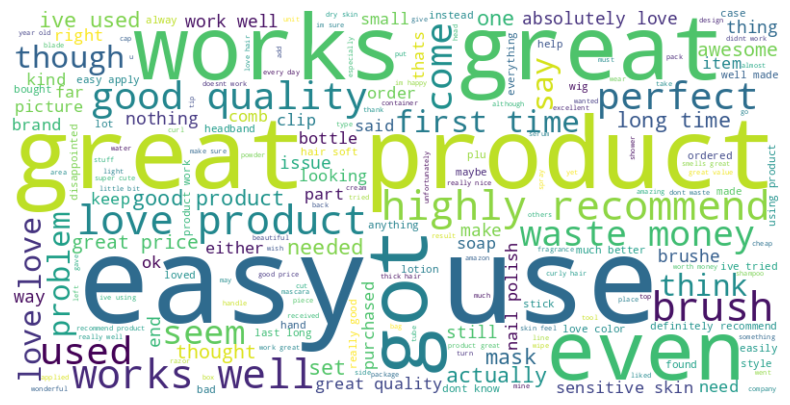

In [0]:
# Word Cloud
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

words = " ".join([" ".join(row["filtered_tokens"]) for row in final_data.select("filtered_tokens").collect()])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
